In [29]:
import numpy as np
import matplotlib

In [30]:
import torch
from torch import nn, optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Dataset & Dataloader

In [31]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [72]:
# Image Augmentation
transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(64),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("Covid19-dataset/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)

test_set = datasets.ImageFolder("Covid19-dataset/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=64, shuffle=True)

# CNN Architecture

In [73]:
class Classifier_CNN(nn.Module):
    def __init__ (self):
        super().__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(3, 8, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(8, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten()
        )
        
        self.fully_connected = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.LogSoftmax(1) 
        )
        
    def forward(self, x):
        return self.fully_connected(self.convolution(x))

# Loss Function and Optimizer


In [74]:
model = Classifier_CNN()
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Training Loop

In [75]:
epochs = 100
train_cost, test_cost = [], []
for i in range (epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) #feed forward
        loss = criterion(output, target)
        loss.backward() #backprop
        
        optimizer.step() #update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    
    train_cost.append(cost / len(train_set))
    
    with torch.no_grad():
        model.eval()
        cost = 0
        for feature, target in testloader:
            output = model(feature)
            loss = criterion(output, target)
            cost += loss.item() * feature.shape[0]
    
        test_cost.append(cost / len(test_set))
    
    
    print(f"\repoch: {i+1} dari {epochs}\n", end=" ")

print('Finished Training')

epoch: 1 dari 100
epoch: 2 dari 100
epoch: 3 dari 100
epoch: 4 dari 100
epoch: 5 dari 100
epoch: 6 dari 100
epoch: 7 dari 100
epoch: 8 dari 100
epoch: 9 dari 100
epoch: 10 dari 100
epoch: 11 dari 100
epoch: 12 dari 100
epoch: 13 dari 100
epoch: 14 dari 100
epoch: 15 dari 100
epoch: 16 dari 100
epoch: 17 dari 100
epoch: 18 dari 100
epoch: 19 dari 100
epoch: 20 dari 100
epoch: 21 dari 100
epoch: 22 dari 100
epoch: 23 dari 100
epoch: 24 dari 100
epoch: 25 dari 100
epoch: 26 dari 100
epoch: 27 dari 100
epoch: 28 dari 100
epoch: 29 dari 100
epoch: 30 dari 100
epoch: 31 dari 100
epoch: 32 dari 100
epoch: 33 dari 100
epoch: 34 dari 100
epoch: 35 dari 100
epoch: 36 dari 100
epoch: 37 dari 100
epoch: 38 dari 100
epoch: 39 dari 100
epoch: 40 dari 100
epoch: 41 dari 100
epoch: 42 dari 100
epoch: 43 dari 100
epoch: 44 dari 100
epoch: 45 dari 100
epoch: 46 dari 100
epoch: 47 dari 100
epoch: 48 dari 100
epoch: 49 dari 100
epoch: 50 dari 100
epoch: 51 dari 100
epoch: 52 dari 100
epoch: 53 dari 100
ep

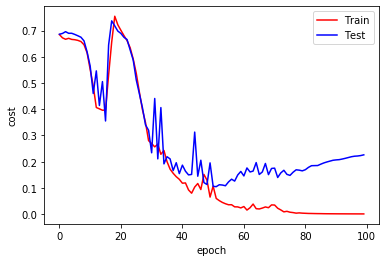

In [80]:
plt.plot(train_cost, 'r-', label="Train")
plt.plot(test_cost, 'b-', label="Test")
plt.xlabel("epoch"); plt.ylabel("cost"); plt.legend()

# Metric Evaluation

In [78]:
correct = 0
total = 0

with torch.no_grad():
    for x,y in testloader:
        images, labels = x.to(device),y.to(device)
        
        outputs = model(images.to(device))
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model: {100 * correct // total} %')

Accuracy of the model: 97 %
